# Fraud Transaction

## Problem Statement

Era Digital semakin berkembang pesat, terutama bisnis perbankan yang menerapkan sistem digital. namun semakin berkembangnya sistem digital ini, semakin mudah juga orang melakukan fraud pada transaksi. oleh karena itu Bank XYZ meminta tolong untuk Tim Data Scientist Purwadhika untuk mendeteksi Fraud yang terjadi saat transaksi.

## Goals

Melihat pola transaksi yang berpotensi menimbulkan Fraud dan melakukan prediksi terhadap transaksi tersebut

## Data Explanation 

- step : maps a unit of time in the real world. In this case 1 step is 1 hour of time. Total steps 744 (30 days simulation).

- type : type of Transaction

- amount : amount of the transaction in local currency.

- nameOrig : customer who started the transaction

- oldbalanceOrg : initial balance before the transaction

- newbalanceOrig : new balance after the transaction

- nameDest : customer who is the recipient of the transaction

- oldbalanceDest : initial balance recipient before the transaction. Note that there is not information for customers that start with M (Merchants).

- newbalanceDest : new balance recipient after the transaction. Note that there is not information for customers that start with M (Merchants).

- isFraud : This is the transactions made by the fraudulent agents inside the simulation. In this specific dataset the fraudulent behavior of the agents aims to profit by taking control or customers accounts and try to empty the funds by transferring to another account and then cashing out of the system.

- isFlaggedFraud : The business model aims to control massive transfers from one account to another and flags illegal attempts. An illegal attempt in this dataset is an attempt to transfer more than 200.000 in a single transaction.

In [1]:
import  numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sidetable as stb

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Read Data

In [3]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
df.describe(include='O')

,type,nameOrig,nameDest
count,6362620,6362620,6362620
unique,5,6353307,2722362
top,CASH_OUT,C1999539787,C1286084959
freq,2237500,3,113


In [6]:
df.info()

#untuk mengetahui kolom apa saja yang ada didataset dan jenis dari kolom tersebut

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [7]:
df.nunique()

#untuk mengetahui jumlah ragam value dari setiap kolom

step                  743
type                    5
amount            5316900
nameOrig          6353307
oldbalanceOrg     1845844
newbalanceOrig    2682586
nameDest          2722362
oldbalanceDest    3614697
newbalanceDest    3555499
isFraud                 2
isFlaggedFraud          2
dtype: int64

In [8]:
# mencari tau informasi dari setiap feature/columns
dfDesc = []

for i in df.columns:
    dfDesc.append([
        i, #nama kolom
        df[i].dtypes, # type data
        df[i].isna().sum(), #jumlah null
        ((df[i].isna().sum())/len(df) *100).round(2), # percentase nul
        df[i].nunique(), #jumlah ragam data
        df[i].drop_duplicates().head(4).values #valuenya
    ])
print("Jumlah rows: ", df.shape[0])
pd.DataFrame(data = dfDesc, columns = ['Features', 'D types', 'Null', 'Null%', 'Unique', 'Unique Value'])

Jumlah rows:  6362620


,Features,D types,Null,Null%,Unique,Unique Value
0,step,int64,0,0.0,743,"[1, 2, 3, 4]"
1,type,object,0,0.0,5,"[PAYMENT, TRANSFER, CASH_OUT, DEBIT]"
2,amount,float64,0,0.0,5316900,"[9839.64, 1864.28, 181.0, 11668.14]"
3,nameOrig,object,0,0.0,6353307,"[C1231006815, C1666544295, C1305486145, C84008..."
4,oldbalanceOrg,float64,0,0.0,1845844,"[170136.0, 21249.0, 181.0, 41554.0]"
5,newbalanceOrig,float64,0,0.0,2682586,"[160296.36, 19384.72, 0.0, 29885.86]"
6,nameDest,object,0,0.0,2722362,"[M1979787155, M2044282225, C553264065, C38997010]"
7,oldbalanceDest,float64,0,0.0,3614697,"[0.0, 21182.0, 41898.0, 10845.0]"
8,newbalanceDest,float64,0,0.0,3555499,"[0.0, 40348.79, 157982.12, 51513.44]"
9,isFraud,int64,0,0.0,2,"[0, 1]"


## Checking outliers and Data Cleaning

In [78]:
df[df['amount']==0]


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,cat_amount


disini ditemukan sebuah keanehan yaitu ketika melakukan cash out, amount yang diambil tidak ada data sama sekali selain itu juga tidak ada saldo berkurang ataupun bertambah dipihak penerima ataupun yang melakukan transaksi, sehingga diputuskan untuk melakukan dropping

In [15]:
df.drop(df[df.amount == 0].index, inplace=True)

In [16]:
df[df['amount']==0]


,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day


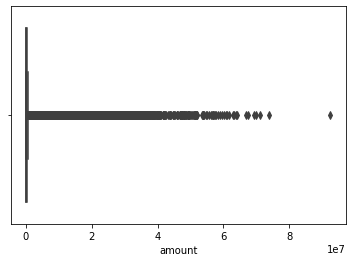

In [18]:
#Checking Outlier Amount
sns.boxplot(df['amount'])
plt.show()

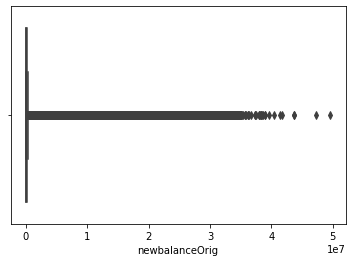

In [23]:
#Checking Outlier newbalanceOrig
sns.boxplot(df['newbalanceOrig'])
plt.show()

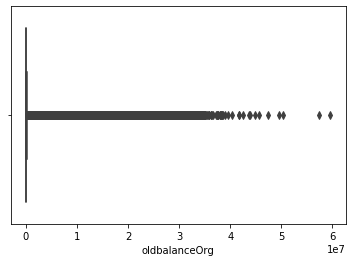

In [24]:
#Checking outlier oldbalanceOrg
sns.boxplot(df['oldbalanceOrg'])
plt.show()

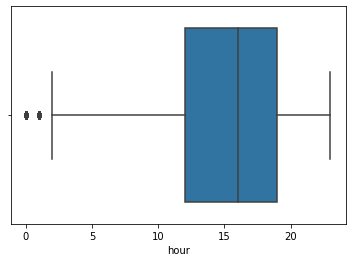

In [21]:
#Checking outlier hour
sns.boxplot(df['hour'])
plt.show()

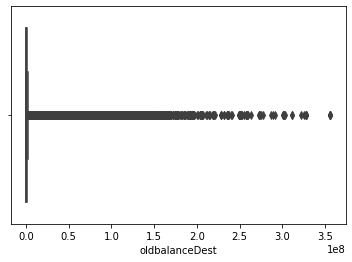

In [25]:
#checking outlier oldbalanceDest
sns.boxplot(df['oldbalanceDest'])
plt.show()

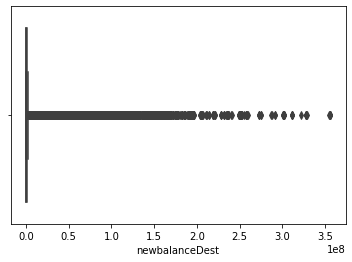

In [26]:
#Checking outlier newbalanceDest
sns.boxplot(df['newbalanceDest'])
plt.show()

In [9]:
# menambah  kolom untuk satuan waktu jam dalam sehari
df['hour']=df['step']%24


In [11]:
df['hour'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23,  0], dtype=int64)

In [13]:
df.drop(columns='step', inplace=True)

### Explatory Data Analysis

#### Univariate

In [28]:
df.stb.freq(['hour'],cum_cols=False)

,hour,count,percent
0,19,647814,10.181586
1,18,580509,9.123764
2,20,553727,8.702836
3,12,483418,7.597801
4,13,468474,7.362929
5,11,445992,7.009583
6,16,441612,6.940743
7,17,439938,6.914433
8,14,439653,6.909954
9,10,425725,6.691050


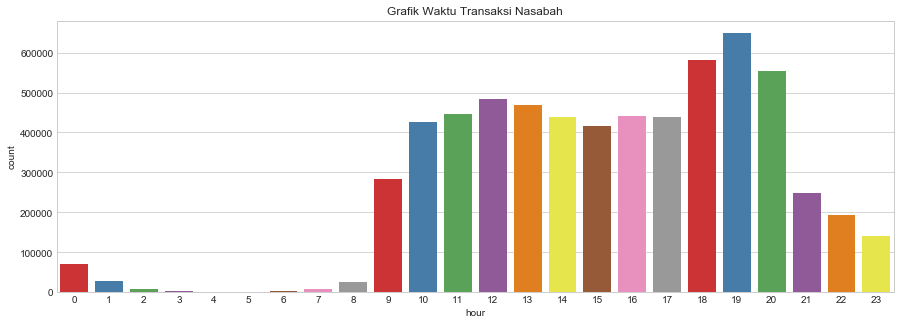

In [121]:
plt.figure(figsize = (15,5))
sns.countplot(df['hour'], palette='Set1')
plt.title("Grafik Waktu Transaksi Nasabah")

plt.show()
plt.style.use('seaborn-whitegrid')

Waktu paling banyak terjadi transaksi adalah sekitar pukul 19.00 dengan percentase 10,1%

In [11]:
df.stb.freq(['type'],cum_cols=False)

,type,count,percent
0,CASH_OUT,2237500,35.166331
1,PAYMENT,2151495,33.814608
2,CASH_IN,1399284,21.992261
3,TRANSFER,532909,8.375622
4,DEBIT,41432,0.651178


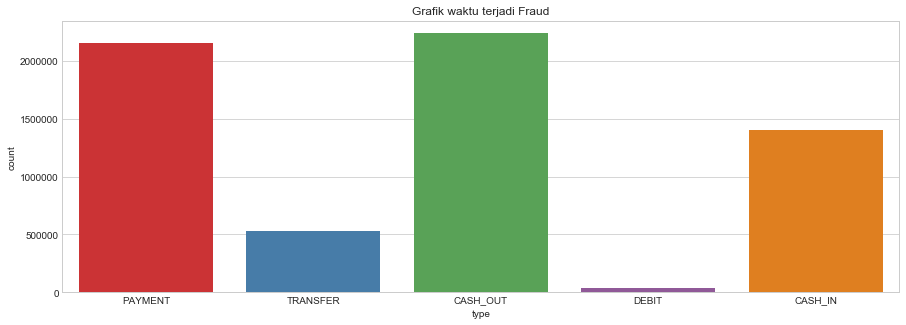

In [125]:
plt.figure(figsize = (15,5))
sns.countplot(df['type'], palette='Set1')
plt.title("Grafik waktu terjadi Fraud")
plt.show()
plt.style.use('seaborn-whitegrid')

Transaksi yang paling sering dilakukan nasabah adalah Cash_OUT (Penarikan uang) dengan percentase 35.1%

In [127]:
df.stb.freq(['isFraud'],cum_cols=False)

,isFraud,count,percent
0,0,6354407,99.871169
1,1,8197,0.128831


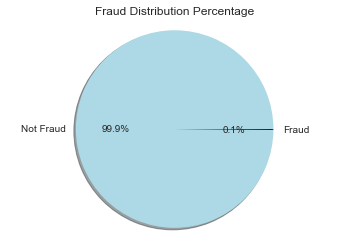

In [129]:
labels = 'Not Fraud', 'Fraud'
colors = ['lightblue', 'Black']
plt.pie(df['isFraud'].value_counts(), labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=0)
plt.axis('equal')
plt.title('Fraud Distribution Percentage')
plt.show()


Pada Data ini Persebaran data Fraud yang akan diteliti sebanyak 0.12% / 8197 data

In [136]:
df_fraud.stb.freq(['isFlaggedFraud'],cum_cols=False)

,isFlaggedFraud,count,percent
0,0,8181,99.804807
1,1,16,0.195193


**karena jumlah penarikan uang datanya sangat beragam, saya memutuskan untuk melakukan recategorize jumlah uang ketika transaksi dengan categori berdasarkan Q1,Q2,Q3**

In [33]:
bin_amount = [0, 14000 , 75000 , 209000, df['amount'].max()]
label = ['0-14K','14K-75K','75K-209K','209K<']

df['cat_amount'] = pd.cut(df['amount'], bins= bin_amount, labels =label)
df.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,hour,day,cat_amount
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,1,2,0-14K
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1,2,0-14K
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,1,2,0-14K
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,1,2,0-14K
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,1,2,0-14K


#### Kali ini tim data ingin melakukan pengecekan range nominal yang sering kali terjadi saat terjadi Fraud

In [120]:
df_fraud.stb.freq(['cat_amount'],cum_cols=False)

,cat_amount,count,percent
0,209K<,5402,65.902159
1,75K-209K,1403,17.116018
2,14K-75K,1058,12.907161
3,0-14K,334,4.074661


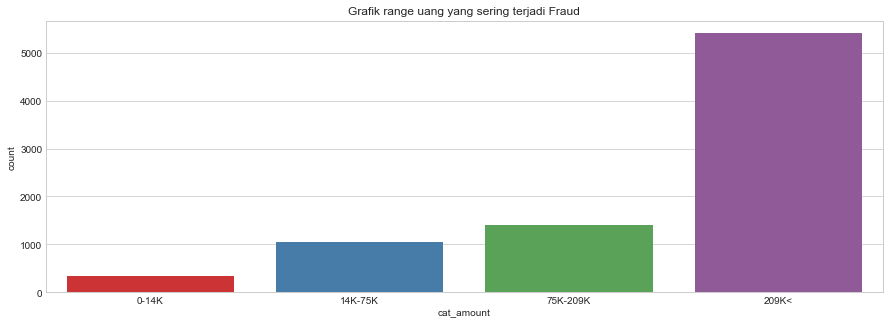

In [130]:
plt.figure(figsize = (15,5))
sns.countplot(df_fraud['cat_amount'], palette='Set1')
plt.title("Grafik range uang yang sering terjadi Fraud")

plt.show()
plt.style.use('seaborn-whitegrid')

range nominal yang paling sering terjadi fraud adalah di atas 209k dengan 5402 kasus

In [131]:
df_fraud.stb.freq(['type'],cum_cols=False)

,type,count,percent
0,CASH_OUT,4100,50.018299
1,TRANSFER,4097,49.981701


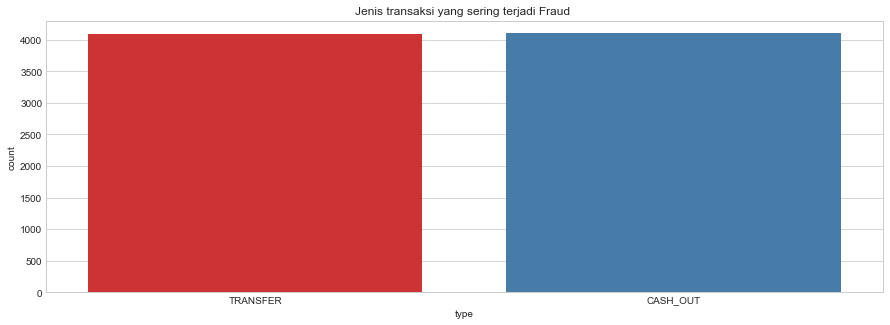

In [134]:
plt.figure(figsize = (15,5))
sns.countplot(df_fraud['type'], palette='Set1')
plt.title("Jenis transaksi yang sering terjadi Fraud ")

plt.show()
plt.style.use('seaborn-whitegrid')

Cash Out/ Penarikan adalah jenis transaksi yang terindikasi sering terjadi fraud  

#### Multivariate

In [69]:
df_fraud= df[df['isFraud']==1]
fr_hour = (pd.crosstab(index=df_fraud['hour'], columns=df_fraud['type']))
fr_hour['total']= fr_hour['CASH_OUT']+fr_hour['TRANSFER']



type,CASH_OUT,TRANSFER,total
hour,,,
0,150,150,300
1,180,178,358
2,185,186,371
3,162,163,325
4,137,137,274
5,183,183,366
6,178,179,357
7,164,164,328
8,184,184,368


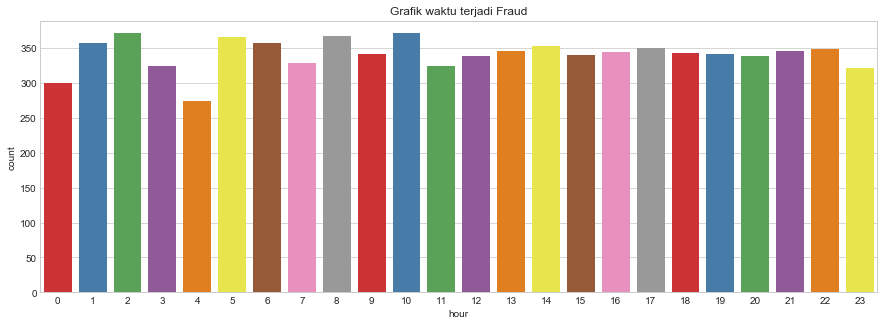

In [126]:
plt.figure(figsize = (15,5))
sns.countplot(df_fraud['hour'], palette='Set1')
plt.title("Grafik waktu terjadi Fraud")

plt.show()
plt.style.use('seaborn-whitegrid')

Pukul 2.00 & 10.00 adalah waktu yang paling sering terjadi fraud

#### Kesimpulan 

- Dari 5 jenis transaksi yang dilakukan nasabah, transaksi yang berpotensi mengalami Fraud adalah Cashout dan Transfer dengan total transaksi yang mengalami fraud ada 8197 transaksi
- Waktu yang paling sering terjadi fraud adalah Pukul 02.00 Pagi dan 10.00 pagi
- Jumlah Nominal yang sering kali mengalami Fraud ada diatas 209.000 dengan jumlah kasus sebanyak 5402 kasus